<a href="https://colab.research.google.com/github/MariaAlice12/DS_Unesp/blob/main/Trab1_CD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



## Visão 1 - Análise das modalidades apresentadas no estudo e seus impactos na autoestima

### **Componentes visuais do estudo:**

### 1 - Tabela de Frequência:
A tabela abaixo apresenta a análise das respostas relacionadas ao tipo de exercício praticado pelos participantes da pesquisa. Foram consideradas respostas com múltipla escolha, separadas por ponto e vírgula, e contabilizadas individualmente.

As colunas incluem:
- **Tipo de Exercício**: a atividade mencionada pelo participante;
- **Frequência**: número de vezes que o exercício foi citado;
- **Frequência Acumulada**: soma progressiva das citações, útil para observar a concentração das preferências;
- **Porcentagem (%)**: participação percentual de cada exercício em relação ao total de menções;
- **Porcentagem Acumulada (%)**: soma progressiva dos percentuais, permitindo identificar a partir de que ponto se cobre a maior parte das respostas.

### 2 - Gráfico de barras:
- **Eixo X**: Tipo de Exercício
- **Eixo Y**: Média de Satisfação

### 3 - Tabela Moda: Motivação X Modalidade
- **Tipo de Exercício**: atividade mencionada pelo participante;
- **Motivação Mais Frequente**: a motivação que mais aparece entre as modalidades.

### Considerações da análise:

- 75% da amostragem faz Musculação ou Corrida, sendo 54% apenas Musculação;
- A maior média de satisfação corporal entre as modalidades foi 7, em uma escala de 1 a 10;
- Os esportes com maior satisfação estão entre: Judô, Esporte Utilitário, Treinamento Funcional e Musculação;
- Embora corrida e musculação estejam entre os esportes mais populares possuem uma média de satisfação corporal de 6;
- De modo geral a maioria das pessoas treinam por bem estar mental, foi a motivação mais frequente entre as modalidades;
- 32% das pessoas que fazem musculação é por estética;



Tipo de Exercício,Frequência,Frequência Acumulada,Porcentagem (%),Porcentagem Acumulada (%)
Musculação,31,31,54.39%,54.39%
Corrida,12,43,21.05%,75.44%
Esportes Coletivos,4,47,7.02%,82.46%
Treinamento Funcional,3,50,5.26%,87.72%
Não pratica exercícios,3,53,5.26%,92.98%
Caminhada,1,54,1.75%,94.73%
Natação,1,55,1.75%,96.48%
Esporte utilitário,1,56,1.75%,98.23%
Judô,1,57,1.75%,99.98%
Total,57,57,100.00%,100.00%


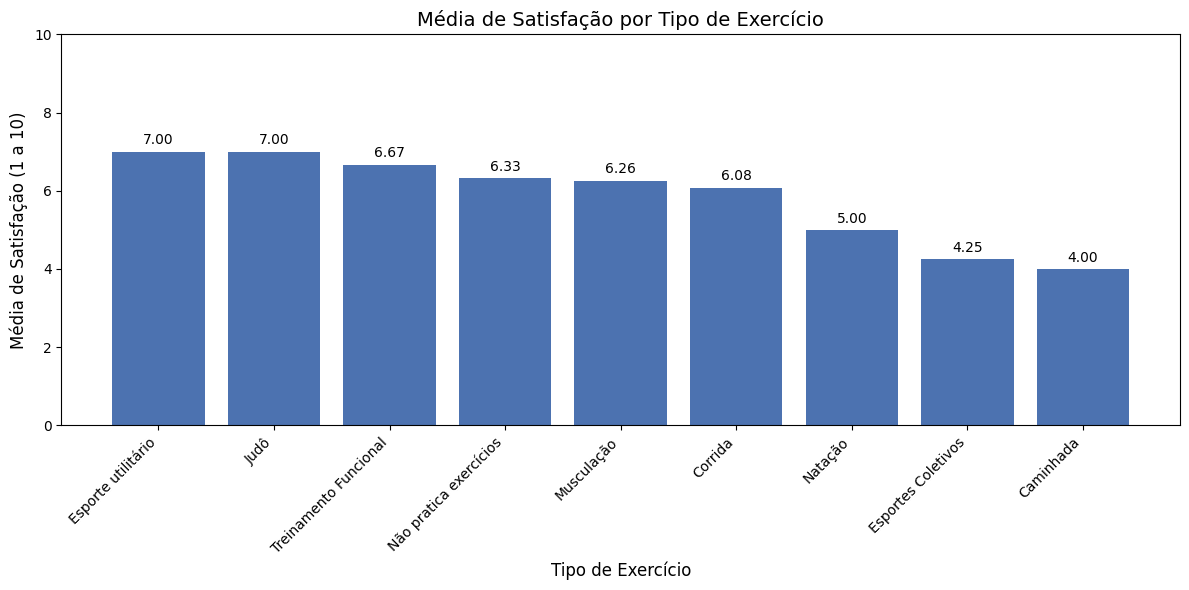

### 3 - Tabela Moda Motivação X Modalidade

,type_exercise,Motivação Mais Frequente,Percentual (%)
0,Caminhada,Bem estar mental,33.33
3,Corrida,Bem estar mental,34.62
8,Esporte utilitário,Bem estar mental,50.00
10,Esportes Coletivos,Bem estar mental,27.27
14,Judô,Bem estar mental,33.33
18,Musculação,Estética,31.82
22,Natação,Bem estar mental,25.00
26,Não pratica exercícios,Não treino,100.00
28,Treinamento Funcional,Estética,50.00




## Visão 2 - Análise do impacto da frequência de exercícios na saúde mental

### **Componentes visuais do estudo:**

### 1 - Tabela Frequência Relativa e Absoluta - Coluna "Humor"

### 2 - Tabela Frequência Acumulada e Absoluta - Coluna "Frequência de Treino"

### 3 - Gráfico Barras Empilhadas:
- **Eixo X**: Frequência Semanal de Treino;
- **Eixo Y**: Percentual de Pessoas que Percebem Alteração de Humor Diária;

### 4 - Gráfico Mapa de Calor:
- **Eixo X**: Humor
- **Eixo Y**: Frequência Semanal de Treino

### Considerações da análise:

- 91% da amostragem treina pelo menos uma vez por semana;
- 45% treina de 3 a 4 vezes na semana;
- A maioria das pessoas que treinam percebem MUITA alteração no humor ou ao menos MODERADAMENTE;
- Apenas 10% das pessoas que treinam de 3 a 4 vezes percebem POUCA alteração no humor, equivale a 2 pessoas de 20 no total;
- 25 pessoas percebem MUITA alteração no humor.

Com base nesta amostra, é possível observar que a prática regular de atividades físicas está associada à melhora do humor e da autoestima. A maioria dos participantes indicou buscar os exercícios como forma de promover bem-estar mental, e a média de satisfação com o próprio corpo foi de 6, considerando os esportes mais praticados. Esses dados sugerem uma relação positiva entre a frequência de exercícios e indicadores subjetivos de saúde mental e autoimagem.

Importante destacar também que dentre as 5 pessoas que percebem pouca ou nenhuma alteração no humor apenas uma delas pratica algum exercício.



Tabela de frequência apenas da frequência de exercícios por semana:


Frequência de Treino,Frequência,Frequência Acumulada,Porcentagem (%),Porcentagem Acumulada (%)
3-4,20,20,45.45%,45.45%
1-2,10,30,22.73%,68.18%
5 ou mais,10,40,22.73%,90.91%
0,4,44,9.09%,100.00%
Total,44,44,100.00%,100.00%


Tabela de frequência apenas do humor:


Humor,Frequência,Frequência Acumulada,Porcentagem (%),Porcentagem Acumulada (%)
Muito,25,25,58.14%,58.14%
Moderadamente,13,38,30.23%,88.37%
Nada,3,41,6.98%,95.35%
Pouco,2,43,4.65%,100.00%
Total,43,43,100.00%,100.00%


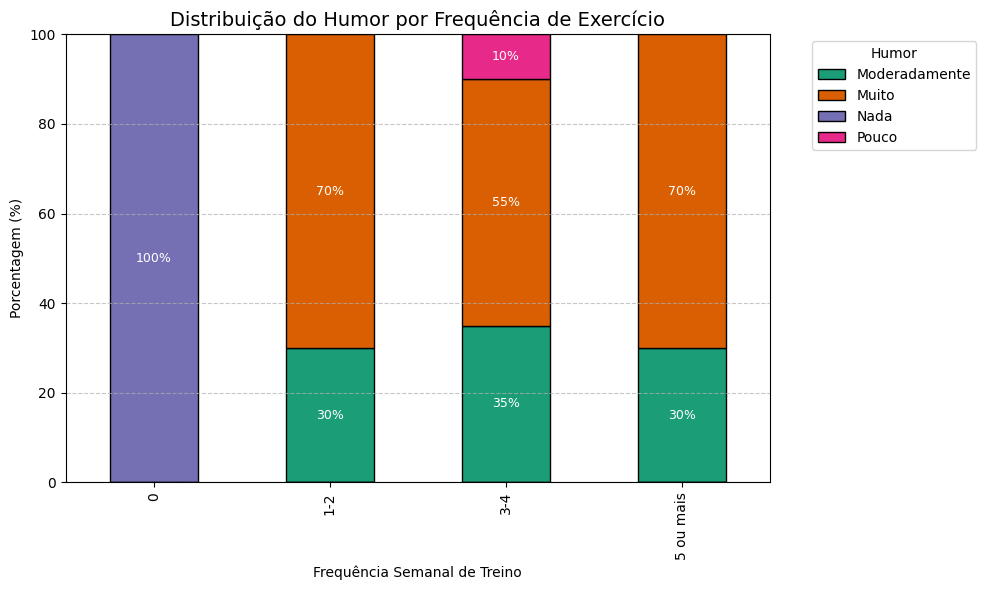

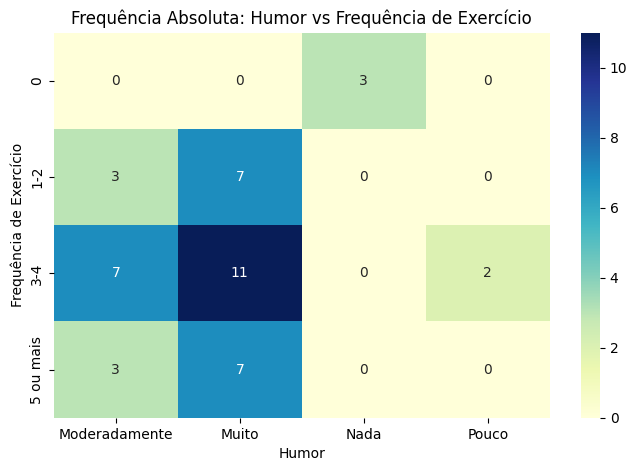

In [46]:
import pandas as pd
from IPython.display import display, Markdown
import matplotlib.pyplot as plt
import seaborn as sns

# Função pra gerar tabela de frequência com porcentagem e acumulado bonitinho
def calcular_frequencia_percentual(df_col, nome_coluna='Categoria'):
    df_counts = df_col.value_counts().reset_index()
    df_counts.columns = [nome_coluna, 'Frequência']

    df_counts['Frequência Acumulada'] = df_counts['Frequência'].cumsum()
    df_counts['Porcentagem (%)'] = (df_counts['Frequência'] / df_counts['Frequência'].sum() * 100).round(2)
    df_counts['Porcentagem Acumulada (%)'] = df_counts['Porcentagem (%)'].cumsum().round(2)

    total_freq = df_counts['Frequência'].sum()
    linha_total = pd.DataFrame({
        nome_coluna: ['Total'],
        'Frequência': [total_freq],
        'Frequência Acumulada': [total_freq],
        'Porcentagem (%)': [100.0],
        'Porcentagem Acumulada (%)': [100.0]
    })

    df_counts_final = pd.concat([df_counts, linha_total], ignore_index=True)

    styled = df_counts_final.style.set_table_styles([
        {'selector': 'th', 'props': [('font-size', '13pt'), ('background-color', '#f0f0f0'), ('text-align', 'center')]},
        {'selector': 'td', 'props': [('font-size', '12pt'), ('text-align', 'center')]},
    ]).format({
        'Porcentagem (%)': '{:.2f}%',
        'Porcentagem Acumulada (%)': '{:.2f}%'
    }).hide(axis='index')

    return styled, df_counts_final

# Lê o arquivo (tem que estar no mesmo diretório ou colocar o caminho certo)
df = pd.read_csv('DATA.txt', sep=',', dtype=str)

# Tira colunas que não interessam (feedback, data, pontuação...)
filtered_columns = [col for col in df.columns if not ("feedback" in col.lower() or "pontuação" in col.lower() or "data" in col.lower())]

# Aqui é IMPORTANTÍSSIMO usar .copy() pra não dar aquele aviso chato (SettingWithCopyWarning)
df_filtered = df[filtered_columns].copy()

# Renomeia as colunas pra nomes mais fáceis de trabalhar
df_filtered.columns = ["frequency", "period_routine", "type_exercise", "motivation", "satisfaction_rate", "humor_influency", "changes"]

# Tira valores nulos que possam dar problema depois
df_filtered.dropna(subset=['type_exercise', 'satisfaction_rate', 'motivation'], inplace=True)

# Separa as opções múltiplas de exercício
df_filtered['type_exercise'] = df_filtered['type_exercise'].str.split(';')

# Cada exercício em uma linha nova
df_exploded = df_filtered.explode('type_exercise')

# Remove espaços e padroniza "não pratica exercício"
df_exploded['type_exercise'] = df_exploded['type_exercise'].str.strip()
df_exploded['type_exercise'] = df_exploded['type_exercise'].replace({
    'Não pratico': 'Não pratica exercícios',
    'Não prático': 'Não pratica exercícios',
    'Nenhum': 'Não pratica exercícios',
    'Não treino': 'Não pratica exercícios'
})

# Apresentação da análise (vai aparecer no notebook com Markdown)
text = """

## Visão 1 - Análise das modalidades apresentadas no estudo e seus impactos na autoestima

### **Componentes visuais do estudo:**

### 1 - Tabela de Frequência:
A tabela abaixo apresenta a análise das respostas relacionadas ao tipo de exercício praticado pelos participantes da pesquisa. Foram consideradas respostas com múltipla escolha, separadas por ponto e vírgula, e contabilizadas individualmente.

As colunas incluem:
- **Tipo de Exercício**: a atividade mencionada pelo participante;
- **Frequência**: número de vezes que o exercício foi citado;
- **Frequência Acumulada**: soma progressiva das citações, útil para observar a concentração das preferências;
- **Porcentagem (%)**: participação percentual de cada exercício em relação ao total de menções;
- **Porcentagem Acumulada (%)**: soma progressiva dos percentuais, permitindo identificar a partir de que ponto se cobre a maior parte das respostas.

### 2 - Gráfico de barras:
- **Eixo X**: Tipo de Exercício
- **Eixo Y**: Média de Satisfação

### 3 - Tabela Moda: Motivação X Modalidade
- **Tipo de Exercício**: atividade mencionada pelo participante;
- **Motivação Mais Frequente**: a motivação que mais aparece entre as modalidades.

### Considerações da análise:

- 75% da amostragem faz Musculação ou Corrida, sendo 54% apenas Musculação;
- A maior média de satisfação corporal entre as modalidades foi 7, em uma escala de 1 a 10;
- Os esportes com maior satisfação estão entre: Judô, Esporte Utilitário, Treinamento Funcional e Musculação;
- Embora corrida e musculação estejam entre os esportes mais populares possuem uma média de satisfação corporal de 6;
- De modo geral a maioria das pessoas treinam por bem estar mental, foi a motivação mais frequente entre as modalidades;
- 32% das pessoas que fazem musculação é por estética;

"""
display(Markdown(text))

# Gera e exibe a tabela de frequência
styled_table, df_frequencia = calcular_frequencia_percentual(df_exploded['type_exercise'], nome_coluna='Tipo de Exercício')
display(styled_table)

# Converte a nota de satisfação pra número mesmo
df_exploded['satisfaction_rate'] = pd.to_numeric(df_exploded['satisfaction_rate'], errors='coerce')

# Calcula a média de satisfação por tipo de exercício
media_por_modalidade = df_exploded.groupby('type_exercise')['satisfaction_rate'].mean().round(2).reset_index()
media_por_modalidade = media_por_modalidade.rename(columns={'satisfaction_rate': 'Média de Satisfação'})

# Ordena da maior pra menor pra ficar mais bonito no gráfico
media_por_modalidade = media_por_modalidade.sort_values(by='Média de Satisfação', ascending=False)


# Garante que os nomes fiquem visíveis e alinhados com as barras
fig, ax = plt.subplots(figsize=(12, 6))

# Cria o gráfico de barras com nomes como labels diretamente
bars = ax.bar(media_por_modalidade['type_exercise'],
              media_por_modalidade['Média de Satisfação'],
              color='#4C72B0')

# Título e labels
ax.set_title('Média de Satisfação por Tipo de Exercício', fontsize=14)
ax.set_xlabel('Tipo de Exercício', fontsize=12)
ax.set_ylabel('Média de Satisfação (1 a 10)', fontsize=12)
ax.set_ylim(0, 10)

# Rotaciona os labels do eixo X pra não embolar
ax.set_xticks(range(len(media_por_modalidade)))
ax.set_xticklabels(media_por_modalidade['type_exercise'], rotation=45, ha='right', fontsize=10)

# Adiciona os valores em cima de cada barra
for bar in bars:
    height = bar.get_height()
    ax.annotate(f'{height:.2f}',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),  # 3 pontos acima da barra
                textcoords="offset points",
                ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

# Explode as motivações também (tipo: "Estética;Bem-estar" vira duas linhas)
df_exploded['motivation'] = df_exploded['motivation'].str.strip().str.split(';')
df_exploded_motivation = df_exploded.explode('motivation')
df_exploded_motivation['motivation'] = df_exploded_motivation['motivation'].str.strip()

# Conta quantas vezes cada motivação aparece por exercício
contagem = (
    df_exploded_motivation
    .groupby(['type_exercise', 'motivation'])
    .size()
    .reset_index(name='contagem')
)

# Soma total de respostas por exercício pra poder calcular o percentual
total_por_exercicio = contagem.groupby('type_exercise')['contagem'].sum().reset_index(name='total')
contagem = contagem.merge(total_por_exercicio, on='type_exercise')
contagem['percentual'] = (contagem['contagem'] / contagem['total']) * 100

# Pega a motivação mais citada pra cada exercício
moda_com_percentual = contagem.sort_values(['type_exercise', 'contagem'], ascending=[True, False])
moda_com_percentual = moda_com_percentual.drop_duplicates('type_exercise')

# Renomeia e arredonda
moda_com_percentual['percentual'] = moda_com_percentual['percentual'].round(2)
moda_final = moda_com_percentual.rename(columns={
    'motivation': 'Motivação Mais Frequente',
    'percentual': 'Percentual (%)'
})[['type_exercise', 'Motivação Mais Frequente', 'Percentual (%)']]

# Mostra tabela de motivação mais comum por modalidade
display(Markdown("### 3 - Tabela Moda Motivação X Modalidade"))
display(moda_final)

df_second = df.copy()

# Tira colunas que não interessam (feedback, data, pontuação...)
filtered_columns = [col for col in df_second.columns if not ("feedback" in col.lower() or "pontuação" in col.lower() or "data" in col.lower())]

# Aqui é IMPORTANTÍSSIMO usar .copy() pra não dar aquele aviso chato (SettingWithCopyWarning)
df_second = df_second[filtered_columns].copy()

# Renomeando as colunas
df_second.columns = ["frequency", "period_routine", "type_exercise", "motivation", "satisfaction_rate", "humor_influency", "changes"]

# Tabela de contingência entre frequência de exercícios e humor
tabela_cruzada = pd.crosstab(df_second['frequency'], df_second['humor_influency'])

# Gráfico de barras empilhadas
tabela_cruzada_percent = tabela_cruzada.div(tabela_cruzada.sum(axis=1), axis=0) * 100

# Continuação da análise
text_2 = """

## Visão 2 - Análise do impacto da frequência de exercícios na saúde mental

### **Componentes visuais do estudo:**

### 1 - Tabela Frequência Relativa e Absoluta - Coluna "Humor"

### 2 - Tabela Frequência Acumulada e Absoluta - Coluna "Frequência de Treino"

### 3 - Gráfico Barras Empilhadas:
- **Eixo X**: Frequência Semanal de Treino;
- **Eixo Y**: Percentual de Pessoas que Percebem Alteração de Humor Diária;

### 4 - Gráfico Mapa de Calor:
- **Eixo X**: Humor
- **Eixo Y**: Frequência Semanal de Treino

### Considerações da análise:

- 91% da amostragem treina pelo menos uma vez por semana;
- 45% treina de 3 a 4 vezes na semana;
- A maioria das pessoas que treinam percebem MUITA alteração no humor ou ao menos MODERADAMENTE;
- Apenas 10% das pessoas que treinam de 3 a 4 vezes percebem POUCA alteração no humor, equivale a 2 pessoas de 20 no total;
- 25 pessoas percebem MUITA alteração no humor.

Com base nesta amostra, é possível observar que a prática regular de atividades físicas está associada à melhora do humor e da autoestima. A maioria dos participantes indicou buscar os exercícios como forma de promover bem-estar mental, e a média de satisfação com o próprio corpo foi de 6, considerando os esportes mais praticados. Esses dados sugerem uma relação positiva entre a frequência de exercícios e indicadores subjetivos de saúde mental e autoimagem.

Importante destacar também que dentre as 5 pessoas que percebem pouca ou nenhuma alteração no humor apenas uma delas pratica algum exercício.

"""

display(Markdown(text_2))

# Gerar tabela de frequência apenas da frequência de exercícios por semana
styled_table, df_freq_exer = calcular_frequencia_percentual(df_second['frequency'], nome_coluna='Frequência de Treino')

print("Tabela de frequência apenas da frequência de exercícios por semana:")
display(styled_table)

# Gerar tabela de frequência apenas do humor
styled_table, df_freq_humor = calcular_frequencia_percentual(df_second['humor_influency'], nome_coluna='Humor')
print("Tabela de frequência apenas do humor:")
display(styled_table)

# Usando a tabela de porcentagem já gerada:
tabela_cruzada_percent = tabela_cruzada.div(tabela_cruzada.sum(axis=1), axis=0) * 100

# Cores distintas e amigáveis (pode ajustar se quiser outra paleta)
colors = ['#1b9e77', '#d95f02', '#7570b3', '#e7298a']  # até 4 categorias de humor

# Criar o gráfico
ax = tabela_cruzada_percent.plot(
    kind='bar',
    stacked=True,
    figsize=(10,6),
    color=colors,
    edgecolor='black'
)

# Título e eixos
plt.title("Distribuição do Humor por Frequência de Exercício", fontsize=14)
plt.xlabel("Frequência Semanal de Treino")
plt.ylabel("Porcentagem (%)")
plt.ylim(0, 100)

# Adiciona rótulos com os valores percentuais nas barras
for c in ax.containers:
    labels = [f'{v.get_height():.0f}%' if v.get_height() > 5 else '' for v in c]
    ax.bar_label(c, labels=labels, label_type='center', fontsize=9, color='white')

# Legenda mais clara
ax.legend(title="Humor", bbox_to_anchor=(1.05, 1), loc='upper left')

# Grade e layout
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Gráfico de calor
plt.figure(figsize=(8, 5))
sns.heatmap(tabela_cruzada, annot=True, fmt='d', cmap='YlGnBu')
plt.title("Frequência Absoluta: Humor vs Frequência de Exercício")
plt.xlabel("Humor")
plt.ylabel("Frequência de Exercício")
plt.show()
